In [ ]:
!pip install pyirr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 1.8 MB/s eta 0:00:00


Calculate Fleiss Kappa with Python library

In [ ]:
##
###fleiss kappa
import pandas as pd
from pyirr import read_data, kappam_fleiss

data = pd.read_csv("/content/raters.csv",sep=',')
data.head()
data = data.drop('Unnamed: 0', axis=1)
# Calculate Fleiss' Kappa
fleiss_kappa_result = kappam_fleiss(data,detail=True)

# Print the result
print(fleiss_kappa_result)

data.head()



            Fleiss` Kappa for m Raters            
Subjects = 68
  Raters = 4
   Kappa = 0.069

       z = 2.288
 p-value = 0.022

   Kappa      z  p.value
1  0.168  3.397    0.001
2  0.114  2.310    0.021
3 -0.073 -1.479    0.139
4  0.138  2.795    0.005
5 -0.004 -0.075    0.941



,rater1,rater2,rater3,rater4
0,1,3,2,1
1,1,1,3,3
2,2,3,3,1
3,2,4,3,2
4,3,3,2,1


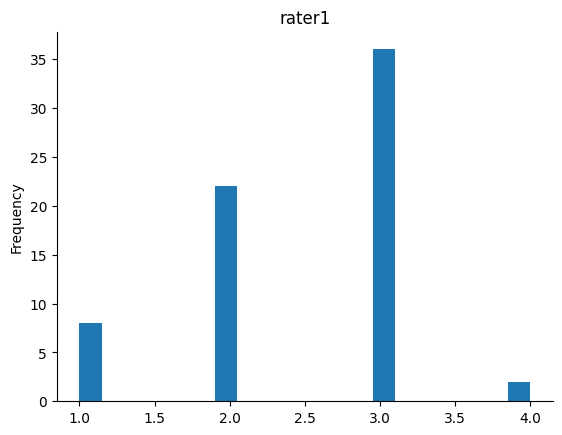

In [ ]:
# @title rater1

from matplotlib import pyplot as plt
data['rater1'].plot(kind='hist', bins=20, title='rater1')
plt.gca().spines[['top', 'right',]].set_visible(False)

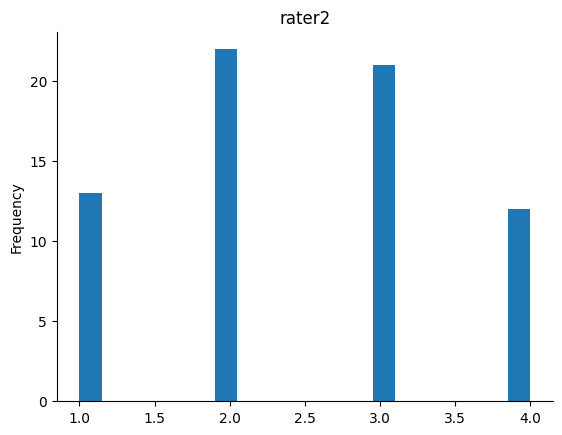

In [ ]:
# @title rater2

from matplotlib import pyplot as plt
data['rater2'].plot(kind='hist', bins=20, title='rater2')
plt.gca().spines[['top', 'right',]].set_visible(False)

Calculate Fleiss Kappa with own python code

In [ ]:
rating_counts = pd.DataFrame(index=data.index)

N = len(data)
n = len(data.columns)

# Iterate over ratings 1 to 5
for rating in range(1, 6):
    # Create a column for each rating and count occurrences
    rating_counts[f'value {rating}'] = data.apply(lambda row: row.eq(rating).sum(), axis=1)

# Calculate the observed agreement as the sum of the squares of the counts
#sumSaquares_agreement = (rating_counts ** 2).sum(axis=1).sum()
#rating_counts
all_ratings = pd.concat([data['rater1'], data['rater2'], data['rater3'], data['rater4']])

total_counts = all_ratings.value_counts()
#sum(total_counts)
#total_counts

# Calculate the percentage of each value count
percentage_counts = total_counts / sum(total_counts)

# Square each percentage value and sum them up
sum_of_squares = sum(percentage_counts**2)

# Display the result
print("Sum of Squared Percentages:", sum_of_squares)

# Calculate p_e (expected agreement)
p_e = sum_of_squares
print("Expected Agreement (p_e):", p_e)

# Calculate observed agreement (p_o)
#1 / (N * n * (n - 1))
part1 = 1 / ((N *n )* (n - 1))
print('part1:',part1)
part2 = (rating_counts ** 2).sum(axis=1).sum()
print('part2:', part2)
part3 = N * n
p_o = part1 * (part2 - part3)

# Calculate Fleiss's Kappa
kappa = (p_o - p_e) / (1 - p_e)

# Display the results
print("Observed Agreement (p_o):", p_o)
print("Expected Agreement (p_e):", p_e)
print("Fleiss Kappa:", kappa)

Sum of Squared Percentages: 0.28646734429065746
Expected Agreement (p_e): 0.28646734429065746
part1: 0.0012254901960784314
part2: 546
Observed Agreement (p_o): 0.33578431372549017
Expected Agreement (p_e): 0.28646734429065746
Fleiss Kappa: 0.06911662562353975


Some other Statistics

In [ ]:
data['SubjectID'] = data.index + 1

# Calculate the average rating for each subject
data['AverageRating'] = data[['rater1', 'rater2', 'rater3', 'rater4']].mean(axis=1)

# Display the updated DataFrame with average ratings
print(data[['SubjectID', 'rater1', 'rater2', 'rater3', 'rater4', 'AverageRating']])
